In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\upvotes_train.csv")

In [3]:
train_data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
for i in train_data:
    a=train_data[i].value_counts()
    print('\n',a)


 2047      1
209715    1
2900      1
853       1
6998      1
         ..
85123     1
95364     1
97413     1
91270     1
4098      1
Name: ID, Length: 330045, dtype: int64

 c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

 0.0         6632
1.0         1077
11.0        1032
16.0        1030
6.0          980
            ... 
158927.0       1
17608.0        1
42819.0        1
35695.0        1
15416.0        1
Name: Reputation, Length: 16527, dtype: int64

 2.0     71549
1.0     65158
3.0     56331
4.0     40485
5.0     27871
        ...  
76.0        1
55.0        1
59.0        1
66.0        1
53.0        1
Name: Answers, Length: 63, dtype: int64

 4118     797
17878    608
45704    483
23223    413
6697     408
        ... 
33671      1
64392      1
62345      1
60298      1
0          1
Name: Username, Length: 141802, dtype: int64

 87.0       101
77.0        99
74.0        94
79.0        94
86.0    

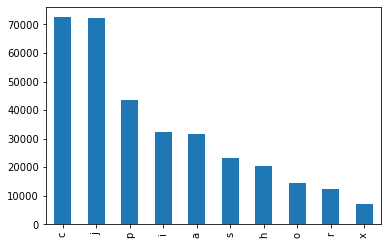

In [5]:
train_data['Tag'].value_counts().plot(kind='bar')

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Tag']=encoder.fit_transform(train_data['Tag'])

In [7]:
train_data.drop(['ID','Username'],axis=1,inplace=True)

In [8]:
train_data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [9]:
features=train_data.drop(['Upvotes'],axis=1).values

In [10]:
label=train_data['Upvotes'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.3,random_state=0)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
print('Poly RMSE :',np.sqrt(mean_squared_error(y_test,y_test_predict)))

Poly RMSE : 786.8175996341547


In [14]:
test_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\upvotes_test.csv")

In [15]:
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [16]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
test_data["Tag"]=lr.fit_transform(test_data["Tag"])
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,0,5645.0,3.0,50652,33200.0
1,71864,1,24511.0,6.0,37685,2730.0
2,141692,3,927.0,1.0,135293,21167.0
3,316833,3,21.0,6.0,166998,18528.0
4,440445,3,4475.0,10.0,53504,57240.0


In [17]:
df_test_new=test_data.drop(['ID','Username'],axis=1)
df_test_new.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [18]:
y_test_predict = poly_model.predict(poly_features.fit_transform(df_test_new))

In [19]:
submission1=pd.DataFrame()
submission1["ID"]=test_data["ID"]
submission1["Upvotes"]=y_test_predict


In [20]:
submission1.to_csv("result.csv",index=0)